# Assignment 02

Option #1: The purpose of this assignment is to get some practice using Pandas to filter and aggregate data and use the outputs of these processes in plots.  Using one of the tools that we have discussed (matplotlib and/or pandas), construct a visualization of the Illinois Building Inventory that communicates the following information -- choose 3 out of the 4 listed below to visualize:

Relationship between the year acquired and the year constructed
Total square footage as a function of congressional district ("Congress Dist")
Average square footage per floor as a function of congressional district
Square footage for the five most common departments (aka "Agency Name") as a function of year.  Here "most common" refers to the departments with the most entries in the table.  You can choose year acquired or year constructed (or some sort of average of the two!), just make sure you state which you chose and why.


Each component will be worth 10 points (5 for code and 5 for writeup of your narrative discussing your process what things did/did not work) and must be a completely communicative visualization -- including labels and a one paragraph writeup of successes and shortcomings in your approach.

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [147]:
df_building=pd.read_csv("C:\\Users\\12172\\Desktop\\Data Visulization\\Week 2\\building_inventory.csv")

Text(0.5, 1.0, 'Years Acquired VS Years Constructed')

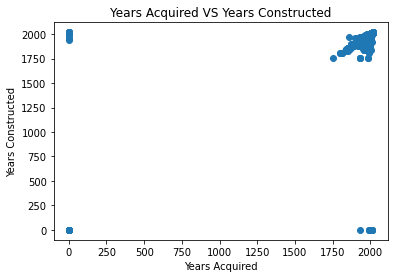

In [181]:
## Relationship between the year acquired and the year constructed

#solution1
df1_building  = df_building.copy()
df1=df1_building.sort_values("Year Acquired")
df1
plt.scatter(x = df1["Year Acquired"],y= df1["Year Constructed"])
plt.xlabel("Years Acquired")
plt.ylabel("Years Constructed")
plt.title("Years Acquired VS Years Constructed")

Text(0.5, 1.0, 'year acquired VS year constructed')

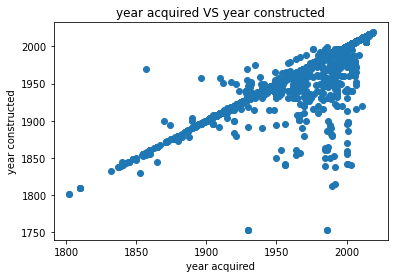

In [182]:
#Igorin the extreme outlier and expand the concentrated areas

df2_building = df_building.copy()
df1 = df2_building.sort_values("Year Acquired")

df2=df1[(df1["Year Acquired"]>1775) & (df1["Year Constructed"]>1550)]
plt.scatter(x = df2["Year Acquired"],y = df2["Year Constructed"])
plt.xlabel("year acquired")
plt.ylabel("year constructed")
plt.title("year acquired VS year constructed")

1. As per the above graph,there is a linear relationship between Year Acquired and Year Constructed, with some date point in outliers
2. The data point is the outliers maybe due to ambiguity when the construction date is before the acquired date or there maybe abnormally long delay in recording construction date. The previous normal plot, you can see dense concentration of points at one particular time frame. After looking at the concentated data points we conclude that the relationship is linear.
3. By using select data point over the concentrated area gives a clear understading of the relationship in between the variables.The scatter points could have been more opaque to view the hiden data points around (2000, 2000) axis.This could be possible disadvantage.   

In [183]:
### Total square footage as a function of congressional district ("Congress Dist")
#Solution-2
df_3  = df_building.copy()

df_group=df_3.groupby("Congress Dist").sum()
#df_group.plot()

df_Sqfootage = df_group.loc[:,["Square Footage"]]  ## Set value for an entire column
df_Sqfootage.head(18)
#type(df_Sqfootage)

,Square Footage
Congress Dist,
0,793124
1,2351762
2,6285684
3,1293687
4,317741
5,1809022
6,145659
7,9211651
8,1461548


(array([       0.,  5000000., 10000000., 15000000., 20000000., 25000000.,
        30000000., 35000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

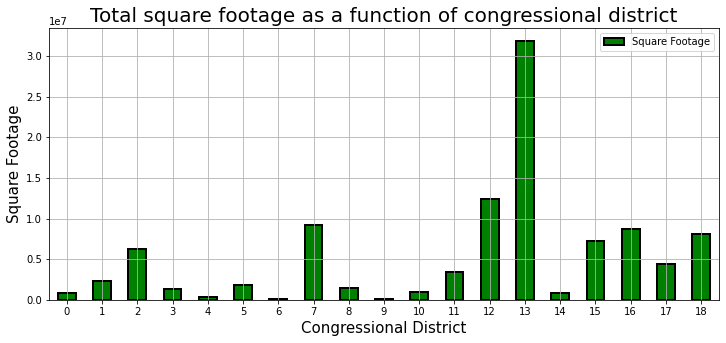

In [200]:
df_group["congress"]=df_group.index

#df_group.head(5)
#grid(color='r', linestyle='-', linewidth=2)

df_group.plot.bar(figsize=(12,5),x ="congress", y = "Square Footage", rot =0, color="green",linestyle='-',linewidth=2, width=0.5, edgecolor="black", grid ='-')
#plt.grid(linestyle='-')
#plt.set_xticklabels(x_labels)

plt.xlabel("Congressional District",size = 15)
plt.ylabel("Square Footage", size =15)
plt.title("Total square footage as a function of congressional district", size =20)
plt.xticks(size = 10)
plt.yticks(size = 10)


1. The graph is total square footage as function of Congressional District. The x axis has all 18 congressinal Districts and y axis convey square footage in power of 7. 
2. The bar graph representtation give a visually impactful graphical representation of total square footage per congressional district due to difference in height and as data is significantly spreadout.From graph we can clearly deduce the 13 congressional district has largest square footage area while 6 or 9 is having the lowest.
3. However, the graph lack the grid line which could have further assisted the graphical visulization.The line graph with data points marked would be a best fit for continuous data. 

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000., 18000., 20000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

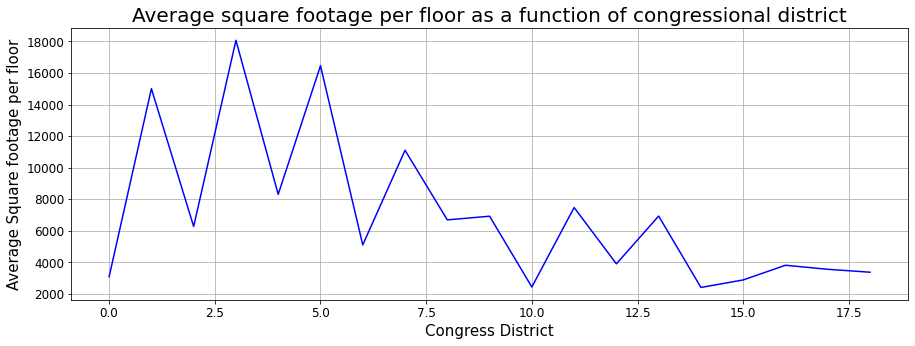

In [201]:
##Average square footage per floor as a function of congressional district
# solution 3

df_4 = df_building.copy()

#df_group=df_4.groupby("Congress Dist").sum()
#df_Sqfootage = df_group.loc[:,["Square Footage"]] 
#df_group["congress"]=df_group.index

df_4["square_footage_average"]=df_4["Square Footage"]/df_4["Total Floors"]
df=df_4[df_4["Total Floors"]!=0]
df=df.groupby("Congress Dist")["square_footage_average"].mean()
df.plot.line(figsize =(15,5),x = df.index, y = df1_mean, color = "blue",grid ='-')

plt.xlabel("Congress District", size = 15)
plt.ylabel("Average Square footage per floor", size = 15)
plt.title("Average square footage per floor as a function of congressional district" , size = 20)

plt.xticks(size = 12)
plt.yticks(size = 12)

The above line graph shows the average square footage per floor. The various crests and troughs represents 
Our current graph gives an overall view of the high and low notes in dataset.the bar graph could suffice the represenation as there are no two same data point to be differentiated. 